# A Simple Malthusian Model 
By: LJ Valencia

This note illustrates how to code a simple Malthusian Model in Python. The purpose of this note is to walk through Python and its modelling applications. The model is based from *Macroeconomics, Fifth Edition* by Williamson (2014). 

[Quant Econ](https://quantecon.org/) and [Macro with Python](https://www.ncachanosky.com/project/macro-python/) are useful resources that informed me in writing this notebook.

## Table of Contents
- [The Production Function](#Production-Function)
- [Population Growth and Consumption Per Worker](#Pop-Growth-Cons-Per-Worker)
- [The Steady State](#steady-state)
- [Scenario: Increase in TFP](#scenario)

## The Production Function <a name="Production-Function"></a>
We start off by defining an aggregate production function which specifies how current output, $Y$, is produced using inputs of land, $L$, and capital, $K$, this can be outlined as:

$$ Y = zF(L,N)$$

where $z$ is total factor productivity. $F$ is a function that has (Constant-Returns-to-Scale) CRS properties. In this economy, $Y$ is defined as a Cobb-Doublas function:

$$ Y = zN^{\theta}L^{1-\theta}$$

where $0<\theta<1$. In this model, investment and savings are non-existent. There is no government spending as well. There is also a limited supply of Land,$L$. For interpretation, think of Y as a perishable good that cannot be stored for prolonged periods of time. 

## Population Growth and Consumption Per Worker <a name="Pop-Growth-Cons-Per-Worker"></a>

The variable $N$ is defined as the population and labour input of the economy. Each person is willing to work for any wage and can only supply a single unit of labour. Furthermore, $N$ grows next period. This future $N$ is known as $N'$, which is defined as:

$$N' = N + Births + Deaths$$ 

or

$$N' = N + N(birth rate - death rate)$$

where the $birth rate$ is the ratio of births to population and the $death rate$ is the ratio of deaths to population. 

Also assume that the $birth rate$ is an increasing function of consumption per capita $(C/N)$ while the $death rate$ is as a decreasing function of $(C/N)$. The equation below is derived from the two aforementioned relationships:

$$\frac{N'}{N} = g(C/N)$$

where g is an increasing function. Note that $\frac{N'}{N}$ is equivalent to 1 plus the population growth rate. In this exercise, $\frac{N'}{N}$ is defined as:

$$ (Y/N)^{\gamma}, 0<\gamma<1$$

With this in mind, we can derive the birth rates and death rates then:

$$N' = (\frac{Y}{N})^{\gamma}N$$

or

$$N = (\frac{Y}{N'^{\frac{-1}{\gamma}}})^(\frac{1}{(-1/\gamma)+1})$$

Under equilibrium, all goods are consumed. Therefore, in this economy, $Y=C$, This is the income-expenditure identity in the economy. As a result of this identity $\frac{N'}{N}$ can be described as:

$$\frac{N'}{N} = g(zF(L,N)/N)$$

$N'$ can be derived with the help of the constant-returns-to-scale propert of the production function:

$$xzF(L,N) = zF(xL,xN)$$

for any $x>0$, so if $x=1/N$ in the above equation, then:

$$zF(L,N)/N = zF(L/N,1)$$

Then multiply each side by $N$:

$$N' = g[zF(L/N, 1)]N$$

The equilibrium is defined as when: 

$$Y = C = zF(L,N)$$

and also:

$$\frac{N'}{N}= g(zF(L/N,1))$$

The code below plots out how population growth depends on Consumption per worker. I pursued generating values and plotting the model using object-oriented programming and basic, multi-level inheritance. First I defined the parameters and arrays as attributes of class `Malthusian_Params`. The attributes of `Malthusian_Params` are then inherited by `Malthusian_Model` which then uses the values to solve values and generate plots. 

The `numpy` library is used for the arrays and  `matplotlib` for plotting the results.

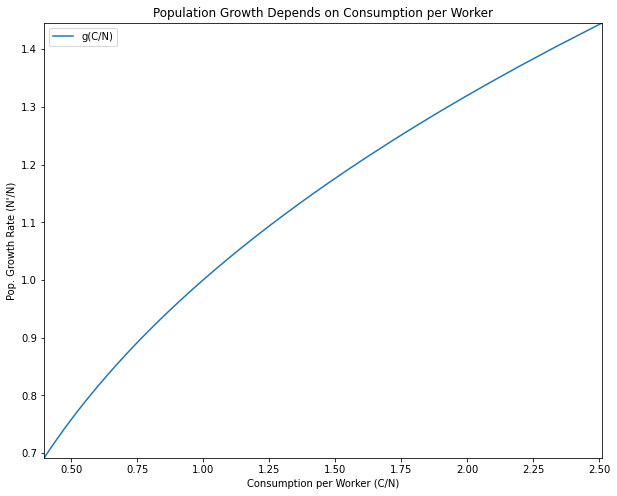

In [29]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np

"Define parameters and arrays"
class Malthusian_Params:
    # parameters 
    z = 1 # total factor productivity
    N = 100 # labour stock
    L = 10 # stock of land; which is a fixed value
    theta = 0.4 # output elasticity of land/capital
    gamma = 0.4
    # numpy arrays;
    n = np.linspace(1, N, 500) # create an array of N; array of Labour
    
class Malthusian_Model(Malthusian_Params):
    
    def __init__(self):
        super().__init__()
        # calculate values
        self.Y = self.production(self.z, self.L, self.n)
        self.n_f = self.future_pop(self.Y, self.n) # create array of future population
        self.cons_worker = self.consumption_per_worker(self.Y, self.n)
        self.pop_growth = self.calc_pop_growth(self.n_f, self.n)
        
        if 0 < self.theta < 1:
            pass
        else:
            raise ValueError("Theta must be greater than zero and less than 1.")
        if 0 < self.gamma < 1:
            pass
        else:
            raise ValueError("Gamma must be greater than zero and less than 1.")
    
    def future_pop(self, Y, n):
        """
        Deriving N' through application of CRS property
        N' = ((Y/n)**gamma)*n
        """
        future_pop = ((Y/n)**(self.gamma))*(n)
        return future_pop
    
    def production(self, z, L, n): 
        "The Cobb-Douglas Production Function"
        Y = z * (L**(self.theta)) * (n**(1-self.theta))
        return Y
    
    def consumption_per_worker(self, Y, n): 
        """
        Consumption Per Worker
        """
        C_N = (Y/n)
        return C_N
    
    def calc_pop_growth(self, n_f, n): 
        "Population Growth Rate; equivalent to 1 + growth rate"
        pop_growth = n_f/n
        return pop_growth
    
    def plot_pop_and_cons_per_worker(self):
        """
        Plot values
        """    
        # population growth and cons. per capita;
        axes_range = [np.min(self.cons_worker), np.max(self.cons_worker), 
                      np.min(self.pop_growth), np.max(self.pop_growth)] # axes range
        fig, ax = plt.subplots(figsize=(10,8))
        ax.set(title="Population Growth Depends on Consumption per Worker", 
               xlabel="Consumption per Worker (C/N)", 
               ylabel="Pop. Growth Rate (N'/N)")
        ax.plot(self.cons_worker, self.pop_growth, label='g(C/N)')
        ax.legend()
        ax.axis(axes_range)
        
Malthusian_Model = Malthusian_Model() # Create instance of the class
Malthusian_Model.plot_pop_and_cons_per_worker()

## The Steady State <a name="steady-state"></a>

A unique steady state arises where:

$$N^{*} = g[zF(\frac{L}{N^{*}}, 1)]N^{*}$$

$$N^{*} = (\frac{z(N^{*\theta}L^{1-\theta})}{N^{*}})^\gamma N^{*}$$

When $N < N^{*}$, $N' > N$ and the population increases. When $N > N^{*}$, $N' < N$ and the population decreases.

The point where the 45-degree line intersects with $g(zF(\frac{L}{N},1))N$ is the rest point or steady state for the population. This is also defined as the long-run equilibrium. Furthermore, lower case letters indicate per-worker quantities, so:

$$\frac{N^{* '}}{N^{*}} = 1$$

$$y \equiv \frac{zF(L,N^{*})}{N^{*}} \equiv zN^{*\theta-1}L^{1-\theta}$$

$$l^{*} \equiv \frac{L}{N^{*}}$$ 

Note again that $C = Y$ and that output per capita ($y$) or consumption per capita ($c$) is used interchangeably in the subsequent section of this notebook.

We then have $y = zf(l)$ which is the per-worker production function. In the steady state, $N' = N = N^{*}$, so $\frac{N'}{N}=1$, this means that $g(c^{*}) = 1$, and that $c^{*} = zf(l^{*})$. Also, since land is fixed, we can determine the steady state population as $N^{*}=\frac{L}{l^{*}}$. 


An essential component of this model is that $c$, which is consumption per-worker is determined solely by $g$. This means that changes in technology (i.e. a positive technology shock) has limited impact on long-run living standards. The code below outlines how to calculate and plot the steady state. 

In the code below, I wrote a function called `stdyst_vals` within the `Malthusian_Model` class to solve for the steady state values. First, I searched for which values of $N^{'}$ and ${N}$, when divided ($\frac{N^{'}}{N}$) is approximately equal to one. Then, I used the obtained $N^{*}$ to solve for the rest of the steady state values.

The steady state N' is: 4.973052280106649
The steady state N is: 4.967935871743487
The steady state consumption per capita is: 1.0025767044715406
The steady state land per capita is: 1.0064542154094394


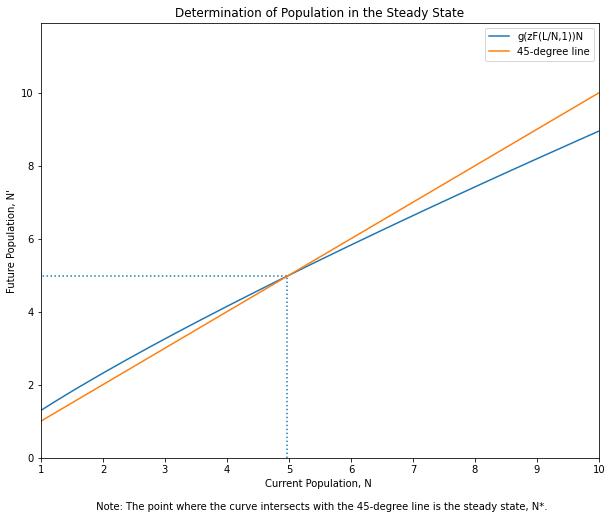

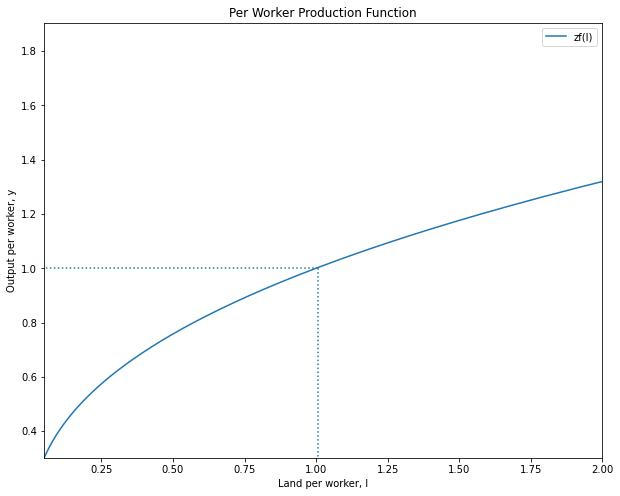

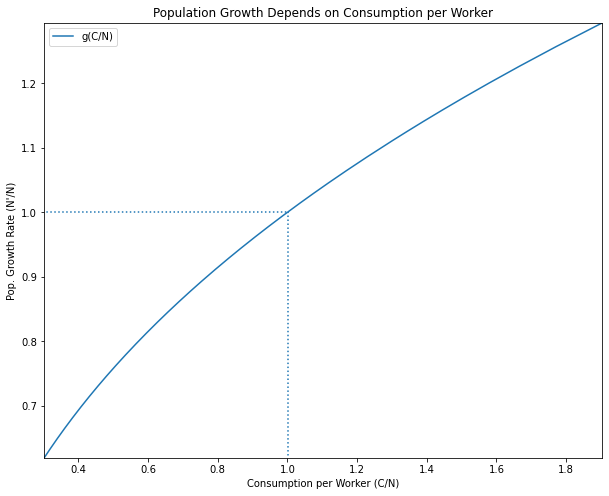

In [30]:
"Define parameters and arrays"
class Malthusian_Params:
    # parameters 
    z = 1 # total factor productivity
    N = 100 # labour stock
    L = 5 # stock of land; which is a fixed value
    theta = 0.4 # output elasticity of land/capital
    gamma = 0.4
    # numpy arrays;
    n = np.linspace(1, N, 500) # create an array of N; array of Labour
    
class Malthusian_Model(Malthusian_Params):
    
    def __init__(self):
        super().__init__()
        # calculate values
        self.Y = self.production(self.z, self.L, self.n)
        self.n_f = self.future_pop(self.Y, self.n) # create array of future population
        self.cons_worker = self.consumption_per_worker(self.Y, self.n)
        self.pop_growth = self.calc_pop_growth(self.n_f, self.n)
        
        if 0 < self.theta < 1:
            pass
        else:
            raise ValueError("Theta must be greater than zero and less than 1.")
        if 0 < self.gamma < 1:
            pass
        else:
            raise ValueError("Gamma must be greater than zero and less than 1.")
    
    def future_pop(self, Y, n):
        """
        Deriving N' through application of CRS property
        N' = ((Y/n)**gamma)*n
        """
        future_pop = ((Y/n)**(self.gamma))*(n)
        return future_pop
    
    def production(self, z, L, n): 
        "The Cobb-Douglas Production Function"
        Y = z * (L**(self.theta)) * (n**(1-self.theta))
        return Y
    
    def consumption_per_worker(self, Y, n): 
        """
        Consumption Per Worker/Output per capita
        """
        C_N = (Y/n)
        return C_N
    
    def land_per_worker(self, n):
        """
        Land per worker
        """
        L_N = self.L/n
        return L_N
        
    def calc_pop_growth(self, n_f, n): 
        "Population Growth Rate; equivalent to 1 + growth rate"
        pop_growth = n_f/n
        return pop_growth
    
    def plot_pop_and_cons_per_worker(self):
        """
        Plot values
        """    
        # population growth and cons. per capita;
        axes_range = [np.min(self.cons_worker), np.max(self.cons_worker), 
                      np.min(self.pop_growth), np.max(self.pop_growth)] # axes range
        fig, ax = plt.subplots(figsize=(10,8))
        ax.set(title="Population Growth Depends on Consumption per Worker", 
               xlabel="Consumption per Worker (C/N)", 
               ylabel="Pop. Growth Rate (N'/N)")
        ax.plot(self.cons_worker, self.pop_growth, label='g(C/N)')
        ax.legend()
        ax.axis(axes_range)
    
    def stdyst_vals(self):
        """
        Solves the steady state values
        """
        def find_nearest(array, value):
            array = np.asarray(array)
            idx = (np.abs(array - value)).argmin()
            return array[idx]
        # Find the value where future_pop/current_pop is closest to 1
        nearest_value = find_nearest(self.n_f/self.n, 1)
        # Use a for loop to retrieve where future_pop/current_pop equal to nearest value
        for future_pop, current_pop in zip(self.n_f, self.n):
            if future_pop/current_pop == nearest_value:
                # Assign as attributes of class
                self.fpop_stdyst = future_pop 
                self.cpop_stdyst = current_pop
        
        # steady state output
        self.stdystate_output = self.production(self.z,  self.L, self.cpop_stdyst)
        self.stdystate_output_per_capita = self.consumption_per_worker(self.stdystate_output, self.cpop_stdyst)
        # steady state land per capita:
        self.stdystate_land_per_capita = self.land_per_worker(self.cpop_stdyst)
        # print steady state values:
        print("The steady state N' is: " + str(self.fpop_stdyst) + "\n" + 
              "The steady state N is: " + str(self.cpop_stdyst) + "\n" + 
              "The steady state consumption per capita is: " + str(self.stdystate_output_per_capita) + "\n" + 
              "The steady state land per capita is: " + str(self.stdystate_land_per_capita))
        
    def _plot(self):
        """
        Plot steady state values
        """
        self.stdyst_vals() # calculate steady state
        # population growth and cons. per capita;
        axes_pop = [np.min(self.n), np.max(self.n)-90, 0, np.max(self.n_f)-50] # axes range
        "Plot the Steady State"
        fig, ax = plt.subplots(figsize=(10,8))
        ax.set(title="Determination of Population in the Steady State", 
               xlabel="Current Population, N \n \n Note: The point where the curve intersects with the 45-degree line is the steady state, N*.", 
               ylabel="Future Population, N'")
        ax.plot(self.n, self.n_f, label='g(zF(L/N,1))N')
        # 45-degree line for steady state
        x = np.linspace(*ax.get_xlim())
        ax.plot(x, x, label='45-degree line')
        ax.legend()
        # add dotted lines to point to the equilibrium
        ax.vlines(x=self.cpop_stdyst,ymin=0,ymax=self.fpop_stdyst, color='tab:blue', linestyles='dotted')
        plt.hlines(y=self.fpop_stdyst, xmin=0, xmax=self.cpop_stdyst, color='tab:blue', linestyles='dotted')
        ax.axis(axes_pop)
        
        self.output_per_capita = self.consumption_per_worker(self.Y, self.n) 
        self.land_per_worker_vals = self.land_per_worker(self.n) # output per capita
        
        "Plot per worker production function"
        axes_per_worker_prod = [np.min(self.land_per_worker_vals), 
                                np.max(self.land_per_worker_vals)-3, 
                                np.min(self.output_per_capita), 
                                np.max(self.output_per_capita)] # axes range
        # per worker production function;
        fig, ax = plt.subplots(figsize=(10,8))
        ax.set(title="Per Worker Production Function", xlabel="Land per worker, l", ylabel="Output per worker, y")
        ax.plot(self.land_per_worker_vals, self.output_per_capita, label='zf(l)')
        ax.legend()
        # add dotted lines to point to the equilibrium
        ax.vlines(x=self.stdystate_land_per_capita,ymin=0,ymax=self.stdystate_output_per_capita, color='tab:blue', linestyles='dotted')
        plt.hlines(y=self.stdystate_output_per_capita, xmin=0, xmax=self.stdystate_land_per_capita, color='tab:blue', linestyles='dotted')
        ax.axis(axes_per_worker_prod)
        
        "Plot population growth"
        # population growth and cons. per capita;
        axes_range = [np.min(self.cons_worker), np.max(self.cons_worker), 
                      np.min(self.pop_growth), np.max(self.pop_growth)] # axes range
        fig, ax = plt.subplots(figsize=(10,8))
        ax.set(title="Population Growth Depends on Consumption per Worker", 
               xlabel="Consumption per Worker (C/N)", 
               ylabel="Pop. Growth Rate (N'/N)")
        ax.plot(self.cons_worker, self.pop_growth, label='g(C/N)')
        ax.legend()
        ax.axis(axes_range)
        # add dotted lines to point to the equilibrium
        ax.vlines(x=self.stdystate_output_per_capita,ymin=0,ymax=self.fpop_stdyst/self.cpop_stdyst, color='tab:blue', linestyles='dotted')
        plt.hlines(y=self.fpop_stdyst/self.cpop_stdyst, xmin=0, xmax=self.stdystate_output_per_capita, color='tab:blue', linestyles='dotted')
        
Malthusian_Model = Malthusian_Model() # Create instance of the class
Malthusian_Model._plot()

## Scenario: Increase in TFP <a name="scenario"></a>

It is useful to analyze the reaction of steady state to shocks. An important feature of the Malthusian Model is that an positive Total Factor Productivity ($z$) shock results in a temporary increase in Consumption per capita ($c$) and a permanent rise in population ($N$). This is because more resources generates more population growth, which offsets a potential net increase in consumption.

To model this, I used a similar approach used by Nicolas Chanosky for modelling shocks in a simple [Solow Model](https://nbviewer.org/github/ncachanosky/Macroeconomics-with-Python/blob/master/Jupyter%20Notebooks/Solow%20Model.ipynb#3.-SHOCKS).

To demonstrate the effect of a permanent shock in $z$, the two formulae below outlines part of the logic written in the function I wrote, `calculate_steady_state_adjustment`:

Steady State Population: 
$$N_{t} = \frac{z_{t-1}L^{\theta}N_{t-1}^{1-\theta}}{(N_{t-1})^{\gamma}N_{t-1}}$$

Steady State Output per Capita:
$$y_{t} = \frac{z_{t}L^{\theta}N_{t}^{1-\theta}}{N_{t}}$$

Note again that in the steady state, $N^{'*} = N^{*}$.

To generate plotted values in the steady state and its adjustment to a permanent shock in $z$, I solved for $N^{*}$. Starting with the initial steady state at period zero. I used a for-loop to calculate the next values of $N^{*}$. The for-loop starts from period 1 to period 200. Then, a permanent shock in $z$ is set halfway at period 100 until period 200. Afterwards, I used the resulting values of $N_{t}^{*}$ to solve for optimal values $y^{*}$.

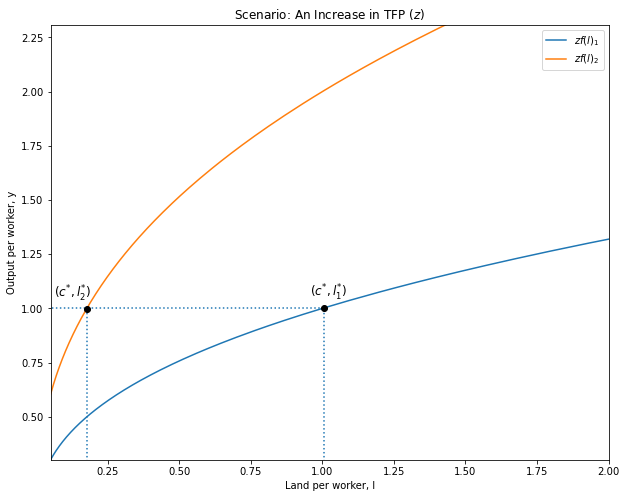

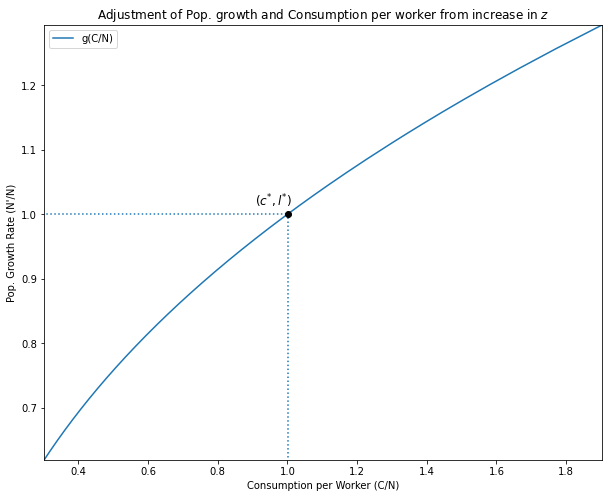

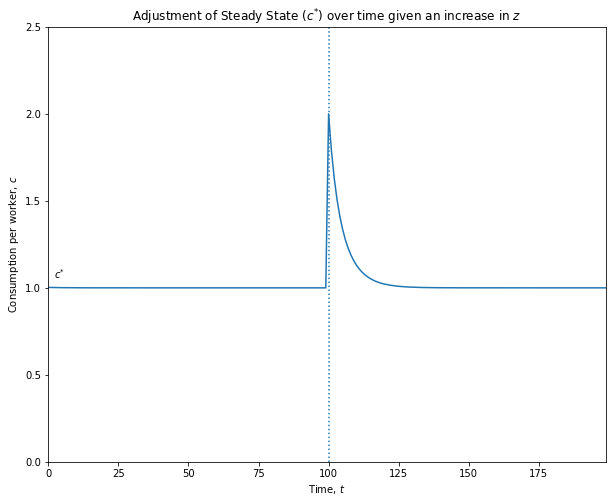

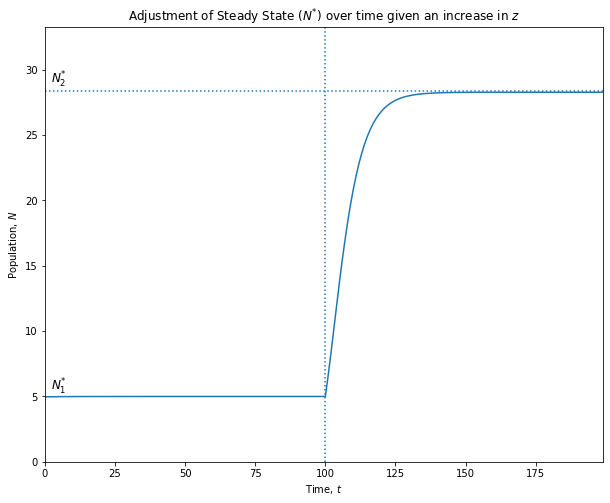

In [78]:
"Define parameters and arrays"
class Malthusian_Params:
    # parameters 
    z = 1 # total factor productivity
    z_ = 2 # total factor productivity - new TFP
    N = 100 # labour stock
    L = 5 # stock of land; which is a fixed value
    theta = 0.4 # output elasticity of land/capital
    gamma = 0.4
    # numpy arrays;
    n = np.linspace(1, N, 500) # create an array of N; array of Labour
    
class Malthusian_Model(Malthusian_Params):
    def __init__(self):
        super().__init__()
        # calculate values
        self.Y = self.production(self.z, self.L, self.n)
        self.n_f = self.future_pop(self.Y, self.n) # create array of future population
        self.cons_worker = self.consumption_per_worker(self.Y, self.n)
        self.pop_growth = self.calc_pop_growth(self.n_f, self.n)
        
        # values for new level of TFP
        self.Y_ = self.production(self.z_, self.L, self.n)
        self.n_f_ = self.future_pop(self.Y_, self.n) # create array of future population
        self.cons_worker_ = self.consumption_per_worker(self.Y_, self.n)
        self.pop_growth_ = self.calc_pop_growth(self.n_f_, self.n)
        
        if 0 < self.theta < 1:
            pass
        else:
            raise ValueError("Theta must be greater than zero and less than 1.")
        if 0 < self.gamma < 1:
            pass
        else:
            raise ValueError("Gamma must be greater than zero and less than 1.")
    
    def future_pop(self, Y, n):
        """
        Deriving N' through application of CRS property
        N' = ((Y/n)**gamma)*n
        """
        future_pop = ((Y/n)**(self.gamma))*(n)
        return future_pop
    
    def production(self, z, L, n): 
        "The Cobb-Douglas Production Function"
        Y = z * (L**(self.theta)) * (n**(1-self.theta))
        return Y
    
    def consumption_per_worker(self, Y, n): 
        """
        Consumption Per Worker/Output per capita
        """
        C_N = (Y/n)
        return C_N
    
    def land_per_worker(self, n):
        """
        Land per worker
        """
        L_N = self.L/n
        return L_N
        
    def calc_pop_growth(self, n_f, n): 
        "Population Growth Rate; equivalent to 1 + growth rate"
        pop_growth = n_f/n
        return pop_growth
    
    def plot_pop_and_cons_per_worker(self):
        """
        Plot values
        """    
        # population growth and cons. per capita;
        axes_range = [np.min(self.cons_worker), np.max(self.cons_worker), 
                      np.min(self.pop_growth), np.max(self.pop_growth)] # axes range
        fig, ax = plt.subplots(figsize=(10,8))
        ax.set(title="Population Growth Depends on Consumption per Worker", 
               xlabel="Consumption per Worker (C/N)", 
               ylabel="Pop. Growth Rate (N'/N)")
        ax.plot(self.cons_worker, self.pop_growth, label='g(C/N)')
        ax.legend()
        ax.axis(axes_range)
    
    def stdyst_vals(self, n_f, n, z):
        """
        Solves the steady state values
        """
        def find_nearest(array, value):
            array = np.asarray(array)
            idx = (np.abs(array - value)).argmin()
            return array[idx]
        # Find the value where future_pop/current_pop is closest to 1
        nearest_value = find_nearest(n_f/n, 1)
        # Use a for loop to retrieve where future_pop/current_pop equal to nearest value
        for future_pop, current_pop in zip(n_f, n):
            if future_pop/current_pop == nearest_value:
                # Assign as attributes of class
                fpop_stdyst = future_pop 
                cpop_stdyst = current_pop
        # steady state output
        stdystate_output = self.production(z, self.L, cpop_stdyst)
        stdystate_output_per_capita = self.consumption_per_worker(stdystate_output, cpop_stdyst)
        # steady state land per capita:
        stdystate_land_per_capita = self.land_per_worker(cpop_stdyst)
        return fpop_stdyst, cpop_stdyst, stdystate_output, stdystate_output_per_capita, stdystate_land_per_capita
    
    def calculate_steady_state_adjustment(self, cpop_stdyst, stdystate_output_per_capita):
        """
        Calculates adjustment of steady state values when there is a shock in TFP
        """
        # values for shock
        self.T = 200                 # Number of periods
        self.t_shock = 100            # Period when shock happens
        self.time = np.arange(self.T)     # Create array of time
        self.y_s = np.zeros(self.T)     # Create array of y per capita
        self.n_s = np.zeros(self.T)     # Create array of n
        self.z_s = np.zeros(self.T)     # Create array of TFP

        self.z_s[0:self.T] = self.z             # Array of TFP
        self.z_s[self.t_shock:self.T] = self.z_      # Shock of TFP

        self.y_s[0] = stdystate_output_per_capita # Set initial value of y
        self.n_s[0] = cpop_stdyst # Set initial value of k
        
        # calculate values using a for-loop
        for j in range(1, self.T):
            self.n_s[j] = ((self.z_s[j-1] * (self.L**(self.theta)) * (self.n_s[j-1]**(1-self.theta))/self.n_s[j-1])**(self.gamma))*(self.n_s[j-1])
            self.y_s[j] = (self.z_s[j] * (self.L**(self.theta)) * (self.n_s[j]**(1-self.theta)))/self.n_s[j]

    
    def _plot_scenario(self):
        """
        Plot steady state values
        """
        # Calculate steady state values where TFP = 1
        fpop_stdyst, cpop_stdyst, stdystate_output, stdystate_output_per_capita, stdystate_land_per_capita = self.stdyst_vals(self.n_f, self.n, self.z) # calculate steady state
        # Calculate steady state values where TFP = 2
        fpop_stdyst_, cpop_stdyst_, stdystate_output_, stdystate_output_per_capita_, stdystate_land_per_capita_ = self.stdyst_vals(self.n_f_, self.n, self.z_) # calculate steady state

        output_per_capita = self.consumption_per_worker(self.Y, self.n) 
        land_per_worker_vals = self.land_per_worker(self.n) # output per capita
        
        output_per_capita_ = self.consumption_per_worker(self.Y_, self.n) 
        "Plot per worker production function"
        axes_per_worker_prod = [np.min(land_per_worker_vals), 
                                np.max(land_per_worker_vals)-3, 
                                np.min(output_per_capita), 
                                np.max(output_per_capita_)-1.5] # axes range
        # per worker production function;
        fig, ax = plt.subplots(figsize=(10,8))
        ax.set(title="Scenario: An Increase in TFP ($z$)", xlabel="Land per worker, l", ylabel="Output per worker, y")
        ax.plot(land_per_worker_vals, output_per_capita, label='$zf(l)_{1}$')
        ax.plot(land_per_worker_vals, output_per_capita_, label='$zf(l)_{2}$')
        ax.legend()
        # add dotted lines to point to the equilibrium
        ax.vlines(x=stdystate_land_per_capita,ymin=0,ymax=stdystate_output_per_capita, color='tab:blue', linestyles='dotted')
        ax.vlines(x=stdystate_land_per_capita_,ymin=0,ymax=stdystate_output_per_capita_, color='tab:blue', linestyles='dotted')
        plt.hlines(y=stdystate_output_per_capita, xmin=0, xmax=stdystate_land_per_capita, color='tab:blue', linestyles='dotted')
        # add dots
        ax.plot(stdystate_land_per_capita, stdystate_output_per_capita,'ro',color='black') # a black dot
        ax.text(stdystate_land_per_capita*0.95,stdystate_output_per_capita*1.05,"$(c^{*}, l_{1}^{*})$", fontsize=12) 
        ax.plot(stdystate_land_per_capita_, stdystate_output_per_capita_,'ro',color='black') # a black dot
        ax.text(stdystate_land_per_capita_*0.35,stdystate_output_per_capita_*1.05,"$(c^{*}, l_{2}^{*})$", fontsize=12) 
        ax.axis(axes_per_worker_prod)
        
        "Plot population growth & Consumption per worker"
        # population growth and cons. per capita;
        axes_range = [np.min(self.cons_worker), np.max(self.cons_worker), 
                      np.min(self.pop_growth), np.max(self.pop_growth)] # axes range
        fig, ax = plt.subplots(figsize=(10,8))
        ax.set(title="Adjustment of Pop. growth and Consumption per worker from increase in $z$", 
               xlabel="Consumption per Worker (C/N)", 
               ylabel="Pop. Growth Rate (N'/N)")
        ax.plot(self.cons_worker, self.pop_growth, label='g(C/N)')
        ax.legend()
        ax.axis(axes_range)
        # add dotted lines to point to the equilibrium
        ax.vlines(x=stdystate_output_per_capita,ymin=0,ymax=fpop_stdyst/cpop_stdyst, color='tab:blue', linestyles='dotted')
        ax.hlines(y=fpop_stdyst/cpop_stdyst, xmin=0, xmax=stdystate_output_per_capita, color='tab:blue', linestyles='dotted')
        ax.plot(stdystate_output_per_capita, fpop_stdyst/cpop_stdyst,'ro',color='black') # a black dot
        ax.text(stdystate_land_per_capita*0.90,stdystate_output_per_capita*1.01,"$(c^{*}, l^{*})$", fontsize=12) 
        """
        Plot steady state over time
        """
        self.calculate_steady_state_adjustment(cpop_stdyst, stdystate_output_per_capita) # Call calculate_steady_state_adjustment to generate plotted values
        
        axes_cons_stdy_state = [0, np.max(self.time), 0, np.max(self.y_s)+0.5] # axes range
        fig, ax = plt.subplots(figsize=(10,8))
        ax.set(title="Adjustment of Steady State ($c^{*}$) over time given an increase in $z$", 
               xlabel="Time, $t$", ylabel="Consumption per worker, $c$")
        ax.plot(self.time, self.y_s)
        ax.vlines(x=100,ymin=0,ymax=np.max(self.y_s)+0.5, color='tab:blue', linestyles='dotted')
        ax.text(2, 1.05,"$c^{*}$") 
        ax.axis(axes_cons_stdy_state)
        
        axes_pop_stdy_state = [0, np.max(self.time), 0, np.max(self.n_s)+5] # axes range
        fig, ax = plt.subplots(figsize=(10,8))
        ax.set(title="Adjustment of Steady State ($N^{*}$) over time given an increase in $z$", 
               xlabel="Time, $t$", ylabel="Population, $N$")
        ax.vlines(x=100,ymin=0,ymax=np.max(self.n_s)+5, color='tab:blue', linestyles='dotted')
        ax.hlines(y=cpop_stdyst_, xmin=0, xmax=self.T, color='tab:blue', linestyles='dotted')
        ax.plot(self.time, self.n_s)
        ax.text(2, cpop_stdyst*1.1,"$N^{*}_{1}$", fontsize=12) 
        ax.text(2, cpop_stdyst_*1.02,"$N^{*}_{2}$", fontsize=12) 
        ax.axis(axes_pop_stdy_state)

Malthusian_Model = Malthusian_Model() # Create instance of the class
Malthusian_Model._plot_scenario()

## References

Cachanosky, N. (2022). *Macro with python*. Nicolás Cachanosky. Retrieved July 05, 2022, from https://www.ncachanosky.com/project/macro-python/ 

QuantEcon (2021). *Quantitative Economics with Python*. Retrieved July 05, 2022, from https://python.quantecon.org/intro.html 

Williamson, S. D. (2014). *Macroeconomics*. Pearson Education. 